In [2]:
import tensorflow as tf


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
tf.__version__

'1.11.0'

In [5]:
#cat_dogs = input_data.read_data_sets(input/datasets/onepanel/cats-dogs/1, one_hot= True)

In [6]:
import keras

In [7]:
from keras.applications import VGG16

In [8]:
conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [9]:
# Create smaller dataset for Dogs vs. Cats
import os, shutil
 
original_dataset_dir = 'input/datasets/onepanel/cats-dogs/1/train'
 
base_dir = 'input/datasets/onepanel/cats-dogs/1/'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
 
# Create directories
train_dir = os.path.join(base_dir,'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
 
train_cats_dir = os.path.join(train_dir,'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
 
train_dogs_dir = os.path.join(train_dir,'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
 
validation_cats_dir = os.path.join(validation_dir,'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
 
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
 
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)
 
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1502,2002)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(0,1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1001,1501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1502,2002)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
 
# Sanity checks
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [11]:
base_dir = 'input/datasets/onepanel/cats-dogs/1/'

In [12]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [13]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size= 20

In [14]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
#Flatten it out first
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [16]:
#importing layers, models and optimizers
from keras import models, layers, optimizers

In [17]:
# importing layers, models and optimizers
from keras import models
from keras import layers
from keras import optimizers

# construct model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# Run the model

history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size = 20,
                   validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 500us/step - loss: 0.5696 - acc: 0.6970 - val_loss: 0.4376 - val_acc: 0.8310
Epoch 2/30
2000/2000 [==============================] - 1s 279us/step - loss: 0.4324 - acc: 0.7995 - val_loss: 0.3616 - val_acc: 0.8560
Epoch 3/30
2000/2000 [==============================] - 1s 277us/step - loss: 0.3562 - acc: 0.8440 - val_loss: 0.3295 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 1s 277us/step - loss: 0.3110 - acc: 0.8745 - val_loss: 0.2978 - val_acc: 0.8790
Epoch 5/30
2000/2000 [==============================] - 1s 277us/step - loss: 0.2877 - acc: 0.8845 - val_loss: 0.3028 - val_acc: 0.8640
Epoch 6/30
2000/2000 [==============================] - 1s 284us/step - loss: 0.2700 - acc: 0.8875 - val_loss: 0.2731 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 1s 280us/step - loss: 0.2484 - acc: 0.9020 - val_loss: 0.2647 - val_acc: 0.8940


In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(265, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 265)               2171145   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 266       
Total params: 16,886,099
Trainable params: 16,886,099
Non-trainable params: 0
_________________________________________________________________


In [20]:
#lets freeze the pre-trained conv layer
print("These are the # of trainable weights before freezing the conv base: ", len(model.trainable_weights))

These are the # of trainable weights before freezing the conv base:  30


In [21]:
conv_base.trainable = False

In [28]:
print("These are the # of trainable weights after freezing the conv base: ", len(model.trainable_weights))

These are the # of trainable weights after freezing the conv base:  4


In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history= model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 30,
            validation_data = validation_generator,
            validation_steps = 50, 
            verbose=2)

Epoch 1/30
 - 27s - loss: 0.6053 - acc: 0.6705 - val_loss: 0.4527 - val_acc: 0.8190
Epoch 2/30
 - 25s - loss: 0.4999 - acc: 0.7625 - val_loss: 0.3844 - val_acc: 0.8390
Epoch 3/30
 - 25s - loss: 0.4472 - acc: 0.8035 - val_loss: 0.3408 - val_acc: 0.8560
Epoch 4/30
 - 24s - loss: 0.3910 - acc: 0.8360 - val_loss: 0.3382 - val_acc: 0.8540
Epoch 5/30
 - 25s - loss: 0.3876 - acc: 0.8255 - val_loss: 0.3029 - val_acc: 0.8740
Epoch 6/30
 - 25s - loss: 0.3600 - acc: 0.8475 - val_loss: 0.2830 - val_acc: 0.8770
Epoch 7/30
 - 25s - loss: 0.3655 - acc: 0.8370 - val_loss: 0.2689 - val_acc: 0.8910
Epoch 8/30
 - 25s - loss: 0.3482 - acc: 0.8495 - val_loss: 0.2656 - val_acc: 0.8890
Epoch 9/30
 - 25s - loss: 0.3482 - acc: 0.8540 - val_loss: 0.2612 - val_acc: 0.8990
Epoch 10/30
 - 25s - loss: 0.3369 - acc: 0.8480 - val_loss: 0.2551 - val_acc: 0.9000
Epoch 11/30
 - 25s - loss: 0.3346 - acc: 0.8530 - val_loss: 0.2524 - val_acc: 0.9050
Epoch 12/30
 - 25s - loss: 0.3245 - acc: 0.8535 - val_loss: 0.2490 - val_a

In [25]:
model.save('cats_dogs_mymodel.h5')

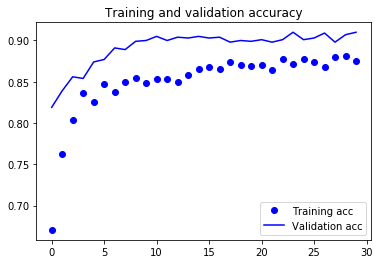

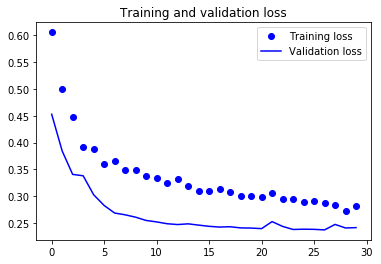

In [27]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
#to choose what to freeze
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [31]:
model.compile(loss='binary_crossentropy',
         optimizer = optimizers.RMSprop(lr=1e-5),
                     metrics= ['acc'])
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=100, validation_data= validation_generator, validation_steps=50 )

Epoch 1/100
100/100 [==============================] - 28s 278ms/step - loss: 0.3001 - acc: 0.8680 - val_loss: 0.2642 - val_acc: 0.8960
Epoch 2/100
100/100 [==============================] - 25s 252ms/step - loss: 0.2534 - acc: 0.8875 - val_loss: 0.2129 - val_acc: 0.9090
Epoch 3/100
100/100 [==============================] - 25s 251ms/step - loss: 0.2457 - acc: 0.8935 - val_loss: 0.2024 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 25s 251ms/step - loss: 0.2184 - acc: 0.9095 - val_loss: 0.2333 - val_acc: 0.9030
Epoch 5/100
100/100 [==============================] - 25s 253ms/step - loss: 0.2083 - acc: 0.9090 - val_loss: 0.1943 - val_acc: 0.9240
Epoch 6/100
100/100 [==============================] - 25s 250ms/step - loss: 0.1912 - acc: 0.9250 - val_loss: 0.1938 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 25s 251ms/step - loss: 0.1828 - acc: 0.9245 - val_loss: 0.1767 - val_acc: 0.9280
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0370 - acc: 0.9860 - val_loss: 0.2374 - val_acc: 0.9360
Epoch 62/100
100/100 [==============================] - 26s 256ms/step - loss: 0.0324 - acc: 0.9895 - val_loss: 0.1844 - val_acc: 0.9540
Epoch 63/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0243 - acc: 0.9910 - val_loss: 0.2722 - val_acc: 0.9360
Epoch 64/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0206 - acc: 0.9935 - val_loss: 0.1613 - val_acc: 0.9430
Epoch 65/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0387 - acc: 0.9890 - val_loss: 0.2445 - val_acc: 0.9490
Epoch 66/100
100/100 [==============================] - 25s 254ms/step - loss: 0.0222 - acc: 0.9930 - val_loss: 0.2439 - val_acc: 0.9380
Epoch 67/100
100/100 [==============================] - 25s 253ms/step - loss: 0.0322 - acc: 0.9910 - val_loss: 0.3413 - val_acc: 0.9250
Epoch 68/100
100/100 [===================

In [32]:
model.save('cats_dogs_tunedmodel.h5')

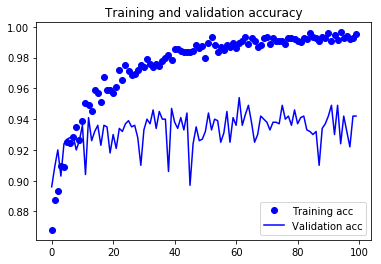

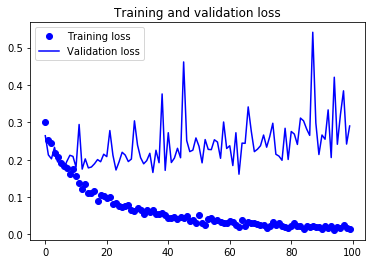

In [33]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [36]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps= 50)
print("Test accuracy is:", test_acc)

Test accuracy is: 0.9379999923706055
